In [2]:
import pandas as pd
import numpy as np
from pandas import set_option
import matplotlib.pyplot as plt

In [3]:
#First of all, import these data for processing
col_names_B = ['Rndrng_NPI', 'Rndrng_Prvdr_Gndr', 'Rndrng_Prvdr_Type','Rndrng_Prvdr_State_FIPS', 'Tot_HCPCS_Cds','Tot_Benes', 'Tot_Srvcs', 'Tot_Sbmtd_Chrg', 'Tot_Mdcr_Pymt_Amt', 'Bene_Avg_Risk_Scre']
col_names_D = ['PRSCRBR_NPI', 'Prscrbr_Gndr','Prscrbr_Type', 'Prscrbr_State_FIPS','Tot_Clms', 'Tot_30day_Fills', 'Tot_Day_Suply', 'Tot_Drug_Cst', 'Tot_Benes']
col_names_DMEPOS = ['Rfrg_NPI', 'Rfrg_Prvdr_Gndr', 'Rfrg_Prvdr_Type', 'Rfrg_Prvdr_State_FIPS','Tot_Suplrs', 'Tot_Suplr_HCPCS_Cds','Tot_Suplr_Benes', 'Tot_Suplr_Clms', 'Tot_Suplr_Srvcs', 'Suplr_Sbmtd_Chrgs', 'Suplr_Mdcr_Pymt_Amt']

In [4]:
# Read the first row of the part B dataset of 2021 file, which contains all column names
with open('Medicare_Physician_Other_Practitioners_by_Provider_2021.csv', 'r', encoding='utf-8') as file:
    # Read the first row and split the column names using comma delimiter
    columns = file.readline().strip().split(',')

# print the names of all columns
for column in columns:
    print(column)

Rndrng_NPI
Rndrng_Prvdr_Last_Org_Name
Rndrng_Prvdr_First_Name
Rndrng_Prvdr_MI
Rndrng_Prvdr_Crdntls
Rndrng_Prvdr_Gndr
Rndrng_Prvdr_Ent_Cd
Rndrng_Prvdr_St1
Rndrng_Prvdr_St2
Rndrng_Prvdr_City
Rndrng_Prvdr_State_Abrvtn
Rndrng_Prvdr_State_FIPS
Rndrng_Prvdr_Zip5
Rndrng_Prvdr_RUCA
Rndrng_Prvdr_RUCA_Desc
Rndrng_Prvdr_Cntry
Rndrng_Prvdr_Type
Rndrng_Prvdr_Mdcr_Prtcptg_Ind
Tot_HCPCS_Cds
Tot_Benes
Tot_Srvcs
Tot_Sbmtd_Chrg
Tot_Mdcr_Alowd_Amt
Tot_Mdcr_Pymt_Amt
Tot_Mdcr_Stdzd_Amt
Drug_Sprsn_Ind
Drug_Tot_HCPCS_Cds
Drug_Tot_Benes
Drug_Tot_Srvcs
Drug_Sbmtd_Chrg
Drug_Mdcr_Alowd_Amt
Drug_Mdcr_Pymt_Amt
Drug_Mdcr_Stdzd_Amt
Med_Sprsn_Ind
Med_Tot_HCPCS_Cds
Med_Tot_Benes
Med_Tot_Srvcs
Med_Sbmtd_Chrg
Med_Mdcr_Alowd_Amt
Med_Mdcr_Pymt_Amt
Med_Mdcr_Stdzd_Amt
Bene_Avg_Age
Bene_Age_LT_65_Cnt
Bene_Age_65_74_Cnt
Bene_Age_75_84_Cnt
Bene_Age_GT_84_Cnt
Bene_Feml_Cnt
Bene_Male_Cnt
Bene_Race_Wht_Cnt
Bene_Race_Black_Cnt
Bene_Race_API_Cnt
Bene_Race_Hspnc_Cnt
Bene_Race_NatInd_Cnt
Bene_Race_Othr_Cnt
Bene_Dual_Cnt
Bene_Ndual_Cn

In [5]:
#import the part B data of 2021
col_names_B = ['Rndrng_NPI', 'Rndrng_Prvdr_Gndr', 'Rndrng_Prvdr_Type','Rndrng_Prvdr_State_FIPS', 'Tot_HCPCS_Cds','Tot_Benes', 'Tot_Srvcs', 'Tot_Sbmtd_Chrg', 'Tot_Mdcr_Pymt_Amt', 'Bene_Avg_Risk_Scre']
Part_B_data_2021 = pd.read_csv('Medicare_Physician_Other_Practitioners_by_Provider_2021.csv',sep=',',usecols=col_names_B)
Part_B_data_df_2021 = pd.DataFrame(Part_B_data_2021).iloc[1:].reset_index(drop=True)
Part_B_data_df_2021

/var/folders/gm/vdq6g76x11l24y8k6gvx9kgm0000gn/T/ipykernel_49229/1172217549.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  Part_B_data_2021 = pd.read_csv('Medicare_Physician_Other_Practitioners_by_Provider_2021.csv',sep=',',usecols=col_names_B)


,Rndrng_NPI,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Type,Tot_HCPCS_Cds,Tot_Benes,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Pymt_Amt,Bene_Avg_Risk_Scre
0,1003000134,M,17,Pathology,21,3216,7359.0,1136431.94,203094.28,1.0785
1,1003000142,M,39,Anesthesiology,52,239,1932.0,295950.73,93430.64,1.4920
2,1003000423,F,39,Obstetrics & Gynecology,19,69,738.0,21300.00,6735.97,0.6362
3,1003000480,M,08,General Surgery,29,112,162.0,180891.00,28071.92,1.8233
4,1003000530,F,42,Internal Medicine,31,404,1487.0,257901.00,140941.85,1.1156
...,...,...,...,...,...,...,...,...,...,...
1198748,1992999569,F,6,Optometry,6,19,30.0,4340.00,2332.38,0.7823
1198749,1992999585,M,42,Chiropractic,2,18,67.0,3388.00,964.58,0.5746
1198750,1992999775,NaN,41,Ambulatory Surgical Center,22,180,255.0,2508800.00,795213.64,0.8958
1198751,1992999825,M,53,Otolaryngology,40,359,661.0,233110.08,71299.35,1.1238


In [6]:
#import the part B data of 2020
Part_B_data_2020 = pd.read_csv('Medicare_Physician_Other_Practitioners_by_Provider_2020.csv',sep=',',usecols=col_names_B,encoding='ISO-8859-1')
Part_B_data_df_2020 = pd.DataFrame(Part_B_data_2020).iloc[1:].reset_index(drop=True)
Part_B_data_df_2020

/var/folders/gm/vdq6g76x11l24y8k6gvx9kgm0000gn/T/ipykernel_49229/1361943881.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  Part_B_data_2020 = pd.read_csv('Medicare_Physician_Other_Practitioners_by_Provider_2020.csv',sep=',',usecols=col_names_B,encoding='ISO-8859-1')


,Rndrng_NPI,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Type,Tot_HCPCS_Cds,Tot_Benes,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Pymt_Amt,Bene_Avg_Risk_Scre
0,1003000134,M,17,Pathology,18,2633,5930.0,915291.00,176497.74,1.1124
1,1003000142,M,39,Anesthesiology,54,167,2003.0,182532.48,76938.82,1.6935
2,1003000423,F,39,Obstetrics & Gynecology,21,56,571.0,23680.00,7224.35,0.7089
3,1003000480,M,08,General Surgery,30,89,125.0,152154.00,23962.85,2.1137
4,1003000522,M,12,Family Practice,34,251,660.0,149315.45,34786.35,1.2401
...,...,...,...,...,...,...,...,...,...,...
1161536,1992999551,F,06,Internal Medicine,40,333,1093.0,182515.00,68252.03,1.2418
1161537,1992999585,M,42,Chiropractic,2,66,415.0,20985.00,11759.42,0.9525
1161538,1992999775,NaN,41,Ambulatory Surgical Center,21,159,202.0,2128250.00,725472.50,0.9370
1161539,1992999825,M,53,Otolaryngology,46,456,851.0,304460.56,85463.83,1.1737


In [7]:
#import the part B data of 2019
Part_B_data_2019 = pd.read_csv('Medicare_Physician_Other_Practitioners_by_Provider_2019.csv',sep=',',usecols=col_names_B,encoding='ISO-8859-1')
Part_B_data_df_2019 = pd.DataFrame(Part_B_data_2019).iloc[1:].reset_index(drop=True)
Part_B_data_df_2019

,Rndrng_NPI,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Type,Tot_HCPCS_Cds,Tot_Benes,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Pymt_Amt,Bene_Avg_Risk_Scre
0,1003000134,M,17.0,Pathology,20,3614,7835.0,1213264.00,228078.56,1.1246
1,1003000142,M,39.0,Anesthesiology,54,264,2530.0,215156.00,83582.18,1.6146
2,1003000423,F,39.0,Obstetrics & Gynecology,24,74,897.0,23150.00,9007.31,0.9065
3,1003000480,M,8.0,General Surgery,30,104,159.0,210964.25,31113.49,1.7191
4,1003000522,M,12.0,Family Practice,46,374,1319.0,349343.44,86736.63,1.3234
...,...,...,...,...,...,...,...,...,...,...
1155864,1992999569,F,6.0,Optometry,8,16,31.0,3758.37,1847.75,0.9686
1155865,1992999759,M,13.0,Nurse Practitioner,29,35,315.0,22182.00,5214.41,1.0969
1155866,1992999775,NaN,41.0,Ambulatory Surgical Center,17,164,254.0,1183550.00,369738.48,1.0471
1155867,1992999825,M,53.0,Otolaryngology,40,535,1034.0,353990.50,100732.73,1.1207


In [8]:
# Read the first row of the part D dataset of 2021 file, which contains all column names
with open('Medicare_Part_D_Prescribers_by_Provider_2021.csv', 'r', encoding='utf-8') as file:
    # Read the first row and split the column names using comma delimiter
    columns = file.readline().strip().split(',')

# print the names of all columns
for column in columns:
    print(column)

PRSCRBR_NPI
Prscrbr_Last_Org_Name
Prscrbr_First_Name
Prscrbr_MI
Prscrbr_Crdntls
Prscrbr_Gndr
Prscrbr_Ent_Cd
Prscrbr_St1
Prscrbr_St2
Prscrbr_City
Prscrbr_State_Abrvtn
Prscrbr_State_FIPS
Prscrbr_zip5
Prscrbr_RUCA
Prscrbr_RUCA_Desc
Prscrbr_Cntry
Prscrbr_Type
Prscrbr_Type_src
Tot_Clms
Tot_30day_Fills
Tot_Drug_Cst
Tot_Day_Suply
Tot_Benes
GE65_Sprsn_Flag
GE65_Tot_Clms
GE65_Tot_30day_Fills
GE65_Tot_Drug_Cst
GE65_Tot_Day_Suply
GE65_Bene_Sprsn_Flag
GE65_Tot_Benes
Brnd_Sprsn_Flag
Brnd_Tot_Clms
Brnd_Tot_Drug_Cst
Gnrc_Sprsn_Flag
Gnrc_Tot_Clms
Gnrc_Tot_Drug_Cst
Othr_Sprsn_Flag
Othr_Tot_Clms
Othr_Tot_Drug_Cst
MAPD_Sprsn_Flag
MAPD_Tot_Clms
MAPD_Tot_Drug_Cst
PDP_Sprsn_Flag
PDP_Tot_Clms
PDP_Tot_Drug_Cst
LIS_Sprsn_Flag
LIS_Tot_Clms
LIS_Drug_Cst
NonLIS_Sprsn_Flag
NonLIS_Tot_Clms
NonLIS_Drug_Cst
Opioid_Tot_Clms
Opioid_Tot_Drug_Cst
Opioid_Tot_Suply
Opioid_Tot_Benes
Opioid_Prscrbr_Rate
Opioid_LA_Tot_Clms
Opioid_LA_Tot_Drug_Cst
Opioid_LA_Tot_Suply
Opioid_LA_Tot_Benes
Opioid_LA_Prscrbr_Rate
Antbtc_Tot_Clms
An

In [9]:
#import the part D data of 2021
Part_D_data_2021 = pd.read_csv('Medicare_Part_D_Prescribers_by_Provider_2021.csv',sep=',',usecols=col_names_D,encoding='ISO-8859-1')
Part_D_data_df_2021 = pd.DataFrame(Part_D_data_2021).iloc[1:].reset_index(drop=True)
#remove some symbols in datasets
Part_D_data_df_2021.replace('$','',regex=False)
Part_D_data_df_2021

,PRSCRBR_NPI,Prscrbr_Gndr,Prscrbr_State_FIPS,Prscrbr_Type,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes
0,1003000142,M,39.0,Anesthesiology,1493,1619.766667,37841.04,43944,299.0
1,1003000167,M,32.0,Dentist,47,47.666667,221.66,455,35.0
2,1003000175,F,6.0,Dentist,20,20.000000,125.82,161,11.0
3,1003000423,F,39.0,Obstetrics & Gynecology,206,378.266667,20757.65,10231,66.0
4,1003000480,M,8.0,General Surgery,36,46.100000,6276.33,909,22.0
...,...,...,...,...,...,...,...,...,...
1287448,1992999650,M,25.0,Dentist,74,74.000000,498.08,1173,30.0
1287449,1992999692,F,39.0,Pharmacist,15,21.000000,2167.29,282,13.0
1287450,1992999817,M,6.0,Orthopaedic Surgery,25,25.000000,248.81,219,17.0
1287451,1992999825,M,53.0,Otolaryngology,206,256.600000,7712.09,4636,102.0


In [10]:
#Transform the type of 2021 Part D dataset
list_1 = {3,5,6,7,8,9}
for i in range(7):
    if i in list_1:
        Part_D_data_df_2021[col_names_D[i]] = Part_D_data_df_2021[col_names_D[i]].astype('double')

In [11]:
#Replace NaNs with median in the 2021 Part D dataset
Part_D_data_df_2021.fillna(Part_D_data_df_2021.median(), inplace = True)
Part_D_data_df_2021.drop(columns=['Prscrbr_Gndr', 'Prscrbr_State_FIPS'])


/var/folders/gm/vdq6g76x11l24y8k6gvx9kgm0000gn/T/ipykernel_49229/3668756567.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Part_D_data_df_2021.fillna(Part_D_data_df_2021.median(), inplace = True)


,PRSCRBR_NPI,Prscrbr_Type,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes
0,1003000142,Anesthesiology,1493,1619.766667,37841.04,43944.0,299.0
1,1003000167,Dentist,47,47.666667,221.66,455.0,35.0
2,1003000175,Dentist,20,20.000000,125.82,161.0,11.0
3,1003000423,Obstetrics & Gynecology,206,378.266667,20757.65,10231.0,66.0
4,1003000480,General Surgery,36,46.100000,6276.33,909.0,22.0
...,...,...,...,...,...,...,...
1287448,1992999650,Dentist,74,74.000000,498.08,1173.0,30.0
1287449,1992999692,Pharmacist,15,21.000000,2167.29,282.0,13.0
1287450,1992999817,Orthopaedic Surgery,25,25.000000,248.81,219.0,17.0
1287451,1992999825,Otolaryngology,206,256.600000,7712.09,4636.0,102.0


In [12]:
#save the new dataset of 2021 part D dataset without NaN
Part_D_data_df_2021.to_csv('delete_nan_of_Part_D_2021.csv', index = False)

In [13]:
#import the part D data of 2020
Part_D_data_2020 = pd.read_csv('Medicare_Part_D_Prescribers_by_Provider_2020.csv',sep=',',usecols=col_names_D,encoding='ISO-8859-1')
Part_D_data_df_2020 = pd.DataFrame(Part_D_data_2020).iloc[1:].reset_index(drop=True)
#remove some symbols in the part D data of 2020
Part_D_data_df_2020.replace('$','',regex=False)
Part_D_data_df_2020

,PRSCRBR_NPI,Prscrbr_Gndr,Prscrbr_State_FIPS,Prscrbr_Type,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes
0,1003000142,M,39.0,Anesthesiology,1992,2145.666667,79803.65,60953,228.0
1,1003000167,M,32.0,Dentist,57,57.700000,327.34,554,43.0
2,1003000175,F,6.0,Dentist,18,18.000000,128.52,181,NaN
3,1003000282,F,47.0,Nurse Practitioner,37,47.000000,3834.98,1366,NaN
4,1003000423,F,39.0,Obstetrics & Gynecology,218,404.933333,19778.34,10242,67.0
...,...,...,...,...,...,...,...,...,...
1255169,1992999569,F,6.0,Optometry,40,80.666667,9870.01,2357,17.0
1255170,1992999650,M,25.0,Dentist,72,73.200000,397.84,1092,27.0
1255171,1992999759,M,13.0,Nurse Practitioner,47,90.466667,13618.96,2704,21.0
1255172,1992999825,M,53.0,Otolaryngology,249,291.066667,10899.52,5801,126.0


In [14]:
#Transform the type of 2020 Part D dataset
list_1 = {3,5,6,7,8,9}
for i in range(7):
    if i in list_1:
        Part_D_data_df_2020[col_names_D[i]] = Part_D_data_df_2020[col_names_D[i]].astype('double')

In [15]:
#Replace NaNs with the median in the Part D dataset of 2020
Part_D_data_df_2020.fillna(Part_D_data_df_2020.median(), inplace = True)
Part_D_data_df_2020.drop(columns=['Prscrbr_Gndr', 'Prscrbr_State_FIPS'])


/var/folders/gm/vdq6g76x11l24y8k6gvx9kgm0000gn/T/ipykernel_49229/1846622855.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Part_D_data_df_2020.fillna(Part_D_data_df_2020.median(), inplace = True)


,PRSCRBR_NPI,Prscrbr_Type,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes
0,1003000142,Anesthesiology,1992,2145.666667,79803.65,60953.0,228.0
1,1003000167,Dentist,57,57.700000,327.34,554.0,43.0
2,1003000175,Dentist,18,18.000000,128.52,181.0,82.0
3,1003000282,Nurse Practitioner,37,47.000000,3834.98,1366.0,82.0
4,1003000423,Obstetrics & Gynecology,218,404.933333,19778.34,10242.0,67.0
...,...,...,...,...,...,...,...
1255169,1992999569,Optometry,40,80.666667,9870.01,2357.0,17.0
1255170,1992999650,Dentist,72,73.200000,397.84,1092.0,27.0
1255171,1992999759,Nurse Practitioner,47,90.466667,13618.96,2704.0,21.0
1255172,1992999825,Otolaryngology,249,291.066667,10899.52,5801.0,126.0


In [16]:
#save the new dataset of 2020 Part D dataset without nan
Part_D_data_df_2020.to_csv('delete_nan_of_Part_D_2020.csv', index = False)

In [17]:
#import the part D data of 2019
Part_D_data_2019 = pd.read_csv('Medicare_Part_D_Prescribers_by_Provider_2019.csv',sep=',',usecols=col_names_D,encoding='ISO-8859-1')
Part_D_data_df_2019 = pd.DataFrame(Part_D_data_2019).iloc[1:].reset_index(drop=True)
#remove some symbols in the part D dataset of 2019
Part_D_data_df_2019.replace('$','',regex=False)
Part_D_data_df_2019

,PRSCRBR_NPI,Prscrbr_Gndr,Prscrbr_State_FIPS,Prscrbr_Type,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes
0,1003000142,M,39.0,Anesthesiology,1092,1156.166667,61987.88,31971,282.0
1,1003000167,M,32.0,Dentist,73,73.000000,370.56,530,52.0
2,1003000175,F,6.0,Dentist,21,21.000000,176.64,162,11.0
3,1003000282,F,47.0,Nurse Practitioner,63,91.000000,2221.14,2693,NaN
4,1003000407,M,42.0,Family Practice,38,38.000000,2317.49,858,13.0
...,...,...,...,...,...,...,...,...,...
1240589,1992999759,M,13.0,Nurse Practitioner,671,1153.866667,77374.92,32068,89.0
1240590,1992999817,M,6.0,Orthopedic Surgery,24,24.000000,239.87,288,15.0
1240591,1992999825,M,53.0,Otolaryngology,255,285.033333,9612.37,5145,134.0
1240592,1992999833,M,36.0,Psychoanalyst,24,24.000000,19427.01,720,NaN


In [18]:
#Transform the type of 2019 Part D dataset
list_1 = {3,5,6,7,8,9}
for i in range(7):
    if i in list_1:
        Part_D_data_df_2019[col_names_D[i]] = Part_D_data_df_2019[col_names_D[i]].astype('double')

In [19]:
#Replace NaNs with the median in the 2019 Part D dataset
Part_D_data_df_2019.fillna(Part_D_data_df_2019.median(), inplace = True)
#drop two unrelated features in the dataset
Part_D_data_df_2019.drop(columns=['Prscrbr_Gndr', 'Prscrbr_State_FIPS'])


/var/folders/gm/vdq6g76x11l24y8k6gvx9kgm0000gn/T/ipykernel_49229/259617088.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Part_D_data_df_2019.fillna(Part_D_data_df_2019.median(), inplace = True)


,PRSCRBR_NPI,Prscrbr_Type,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes
0,1003000142,Anesthesiology,1092,1156.166667,61987.88,31971.0,282.0
1,1003000167,Dentist,73,73.000000,370.56,530.0,52.0
2,1003000175,Dentist,21,21.000000,176.64,162.0,11.0
3,1003000282,Nurse Practitioner,63,91.000000,2221.14,2693.0,87.0
4,1003000407,Family Practice,38,38.000000,2317.49,858.0,13.0
...,...,...,...,...,...,...,...
1240589,1992999759,Nurse Practitioner,671,1153.866667,77374.92,32068.0,89.0
1240590,1992999817,Orthopedic Surgery,24,24.000000,239.87,288.0,15.0
1240591,1992999825,Otolaryngology,255,285.033333,9612.37,5145.0,134.0
1240592,1992999833,Psychoanalyst,24,24.000000,19427.01,720.0,87.0


In [20]:
#save the new dataset of Part D dataset in 2019 without nan
Part_D_data_df_2019.to_csv('delete_nan_of_Part_D_2019.csv', index = False)

In [21]:
# Read the first row of the DMEPOS file in 2021, which contains all column names
with open('Medicare_Durable_Medical_Equipment_Devices_Supplies_by_Referring_Provider_Data_2021.csv', 'r', encoding='utf-8') as file:
    # Read the first row and split the column names using comma delimiter
    columns = file.readline().strip().split(',')

# print the names of all columns in DMEPOS 
for column in columns:
    print(column)

Rfrg_NPI
Rfrg_Prvdr_Last_Name_Org
Rfrg_Prvdr_First_Name
Rfrg_Prvdr_MI
Rfrg_Prvdr_Crdntls
Rfrg_Prvdr_Gndr
Rfrg_Prvdr_Ent_Cd
Rfrg_Prvdr_St1
Rfrg_Prvdr_St2
Rfrg_Prvdr_City
Rfrg_Prvdr_State_Abrvtn
Rfrg_Prvdr_State_FIPS
Rfrg_Prvdr_Zip5
Rfrg_Prvdr_RUCA
Rfrg_Prvdr_RUCA_Desc
Rfrg_Prvdr_Cntry
Rfrg_Prvdr_Type
Rfrg_Prvdr_Type_Flag
Tot_Suplrs
Tot_Suplr_HCPCS_Cds
Tot_Suplr_Benes
Tot_Suplr_Clms
Tot_Suplr_Srvcs
Suplr_Sbmtd_Chrgs
Suplr_Mdcr_Alowd_Amt
Suplr_Mdcr_Pymt_Amt
Suplr_Mdcr_Stdzd_Pymt_Amt
DME_Sprsn_Ind
DME_Tot_Suplrs
DME_Tot_Suplr_HCPCS_Cds
DME_Tot_Suplr_Benes
DME_Tot_Suplr_Clms
DME_Tot_Suplr_Srvcs
DME_Suplr_Sbmtd_Chrgs
DME_Suplr_Mdcr_Alowd_Amt
DME_Suplr_Mdcr_Pymt_Amt
DME_Suplr_Mdcr_Stdzd_Pymt_Amt
POS_Sprsn_Ind
POS_Tot_Suplrs
POS_Tot_Suplr_HCPCS_Cds
POS_Tot_Suplr_Benes
POS_Tot_Suplr_Clms
POS_Tot_Suplr_Srvcs
POS_Suplr_Sbmtd_Chrgs
POS_Suplr_Mdcr_Alowd_Amt
POS_Suplr_Mdcr_Pymt_Amt
POS_Suplr_Mdcr_Stdzd_Pymt_Amt
Drug_Sprsn_Ind
Drug_Tot_Suplrs
Drug_Tot_Suplr_HCPCS_Cds
Drug_Tot_Suplr_Benes
Drug_Tot_Sup

In [22]:
#import DMEPOS data of 2021    
DMEPOS_data_2021 = pd.read_csv('Medicare_Durable_Medical_Equipment_Devices_Supplies_by_Referring_Provider_Data_2021.csv', sep=',', usecols = col_names_DMEPOS,encoding='ISO-8859-1')
DMEPOS_data_df_2021 = pd.DataFrame(DMEPOS_data_2021).iloc[1:].reset_index(drop=True)
DMEPOS_data_df_2021

/var/folders/gm/vdq6g76x11l24y8k6gvx9kgm0000gn/T/ipykernel_49229/3653196340.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  DMEPOS_data_2021 = pd.read_csv('Medicare_Durable_Medical_Equipment_Devices_Supplies_by_Referring_Provider_Data_2021.csv', sep=',', usecols = col_names_DMEPOS,encoding='ISO-8859-1')


,Rfrg_NPI,Rfrg_Prvdr_Gndr,Rfrg_Prvdr_State_FIPS,Rfrg_Prvdr_Type,Tot_Suplrs,Tot_Suplr_HCPCS_Cds,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Suplr_Sbmtd_Chrgs,Suplr_Mdcr_Pymt_Amt
0,1003000480,M,8,General Surgery,4,3,NaN,11,24,4863.99,1082.62
1,1003000522,M,12,Family Practice,10,22,13.0,47,201,11438.01,1846.10
2,1003000530,F,42,Internal Medicine,14,35,18.0,66,654,19129.66,5619.54
3,1003000597,M,40,Urology,4,11,NaN,14,2274,13075.14,5449.53
4,1003000902,F,21,Family Practice,27,45,31.0,162,5306,45503.03,12046.81
...,...,...,...,...,...,...,...,...,...,...,...
384258,1992998645,F,48,Internal Medicine,36,74,46.0,206,5942,157075.33,48162.30
384259,1992998736,M,12,Family Practice,15,32,13.0,33,530,19228.91,4791.03
384260,1992999122,M,12,Internal Medicine,51,76,86.0,486,24758,202532.22,54549.76
384261,1992999551,F,6,Internal Medicine,23,61,25.0,104,1390,65535.62,24883.53


In [23]:
#Transform the type of 2021 DMEPOS dataset
list_2 = {3,4,5,6,7,8}
for j in range(9):
    if j in list_2:
        DMEPOS_data_df_2021[col_names_DMEPOS[j]] = pd.to_numeric(
            DMEPOS_data_df_2021[col_names_DMEPOS[j]], errors='coerce'
        )
        
DMEPOS_data_df_2021.fillna(DMEPOS_data_df_2021.median(), inplace = True)
#drop two unrelated feautures in DMEPOS
DMEPOS_data_df_2021.drop(columns=['Rfrg_Prvdr_State_FIPS','Tot_Suplr_HCPCS_Cds'])


/var/folders/gm/vdq6g76x11l24y8k6gvx9kgm0000gn/T/ipykernel_49229/3493326450.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  DMEPOS_data_df_2021.fillna(DMEPOS_data_df_2021.median(), inplace = True)


,Rfrg_NPI,Rfrg_Prvdr_Gndr,Rfrg_Prvdr_Type,Tot_Suplrs,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Suplr_Sbmtd_Chrgs,Suplr_Mdcr_Pymt_Amt
0,1003000480,M,General Surgery,4,25.0,11,24,4863.99,1082.62
1,1003000522,M,Family Practice,10,13.0,47,201,11438.01,1846.10
2,1003000530,F,Internal Medicine,14,18.0,66,654,19129.66,5619.54
3,1003000597,M,Urology,4,25.0,14,2274,13075.14,5449.53
4,1003000902,F,Family Practice,27,31.0,162,5306,45503.03,12046.81
...,...,...,...,...,...,...,...,...,...
384258,1992998645,F,Internal Medicine,36,46.0,206,5942,157075.33,48162.30
384259,1992998736,M,Family Practice,15,13.0,33,530,19228.91,4791.03
384260,1992999122,M,Internal Medicine,51,86.0,486,24758,202532.22,54549.76
384261,1992999551,F,Internal Medicine,23,25.0,104,1390,65535.62,24883.53


In [24]:
#save the new dataset of DMEPOS in 2021 without nan
DMEPOS_data_df_2021.to_csv('delete_nan_of_DMEPOS_2021.csv', index = False)

In [25]:
#import DMEPOS data of 2020        
DMEPOS_data_2020 = pd.read_csv('Medicare_Durable_Medical_Equipment_Devices_Supplies_by_Referring_Provider_Data_2020.csv', sep=',', usecols = col_names_DMEPOS,encoding='ISO-8859-1')
DMEPOS_data_df_2020 = pd.DataFrame(DMEPOS_data_2020).iloc[1:].reset_index(drop=True)
DMEPOS_data_df_2020

/var/folders/gm/vdq6g76x11l24y8k6gvx9kgm0000gn/T/ipykernel_49229/3050043224.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  DMEPOS_data_2020 = pd.read_csv('Medicare_Durable_Medical_Equipment_Devices_Supplies_by_Referring_Provider_Data_2020.csv', sep=',', usecols = col_names_DMEPOS,encoding='ISO-8859-1')


,Rfrg_NPI,Rfrg_Prvdr_Gndr,Rfrg_Prvdr_State_FIPS,Rfrg_Prvdr_Type,Tot_Suplrs,Tot_Suplr_HCPCS_Cds,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Suplr_Sbmtd_Chrgs,Suplr_Mdcr_Pymt_Amt
0,1003000522,M,12,Family Practice,28,47,33.0,97,1136,44435.62,17189.84
1,1003000530,F,42,Internal Medicine,11,44,19.0,65,1117,18711.69,5577.12
2,1003000597,M,40,Urology,5,12,NaN,29,4778,26951.30,9705.36
3,1003000738,F,48,Physician Assistant,1,1,13.0,13,13,2080.00,1134.81
4,1003000902,F,21,Family Practice,37,55,50.0,237,6038,59451.27,14444.34
...,...,...,...,...,...,...,...,...,...,...,...
383482,1992998645,F,48,Internal Medicine,35,67,46.0,180,4981,107216.47,28209.50
383483,1992998736,M,12,Family Practice,12,17,11.0,35,384,11429.84,2628.15
383484,1992999122,M,12,Internal Medicine,47,56,86.0,502,11743,173452.58,34539.16
383485,1992999551,F,6,Internal Medicine,11,27,14.0,55,322,19471.42,4794.00


In [26]:
#Transform the type of 2020 DMEPOS dataset
list_2 = {3,4,5,6,7,8}
for j in range(9):
    if j in list_2:
        DMEPOS_data_df_2020[col_names_DMEPOS[j]] = pd.to_numeric(
            DMEPOS_data_df_2020[col_names_DMEPOS[j]], errors='coerce'
        )
        
DMEPOS_data_df_2020.fillna(DMEPOS_data_df_2020.median(), inplace = True)
#Drop two unrelated features in DMEPOS dataset of 2020
DMEPOS_data_df_2020.drop(columns=['Rfrg_Prvdr_State_FIPS','Tot_Suplr_HCPCS_Cds'])

/var/folders/gm/vdq6g76x11l24y8k6gvx9kgm0000gn/T/ipykernel_49229/2470910887.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  DMEPOS_data_df_2020.fillna(DMEPOS_data_df_2020.median(), inplace = True)


,Rfrg_NPI,Rfrg_Prvdr_Gndr,Rfrg_Prvdr_Type,Tot_Suplrs,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Suplr_Sbmtd_Chrgs,Suplr_Mdcr_Pymt_Amt
0,1003000522,M,Family Practice,28,33.0,97,1136,44435.62,17189.84
1,1003000530,F,Internal Medicine,11,19.0,65,1117,18711.69,5577.12
2,1003000597,M,Urology,5,26.0,29,4778,26951.30,9705.36
3,1003000738,F,Physician Assistant,1,13.0,13,13,2080.00,1134.81
4,1003000902,F,Family Practice,37,50.0,237,6038,59451.27,14444.34
...,...,...,...,...,...,...,...,...,...
383482,1992998645,F,Internal Medicine,35,46.0,180,4981,107216.47,28209.50
383483,1992998736,M,Family Practice,12,11.0,35,384,11429.84,2628.15
383484,1992999122,M,Internal Medicine,47,86.0,502,11743,173452.58,34539.16
383485,1992999551,F,Internal Medicine,11,14.0,55,322,19471.42,4794.00


In [27]:
#save the new dataset of DMEPOS dataset in 2020 without missing value 'NaN'
DMEPOS_data_df_2020.to_csv('delete_nan_of_DMEPOS_2020.csv', index = False)

In [28]:
#import DMEPOS data of 2019       
DMEPOS_data_2019 = pd.read_csv('Medicare_Durable_Medical_Equipment_Devices_Supplies_by_Referring_Provider_Data_2019.csv', sep=',', usecols = col_names_DMEPOS,encoding='ISO-8859-1')
DMEPOS_data_df_2019 = pd.DataFrame(DMEPOS_data_2019).iloc[1:].reset_index(drop=True)
DMEPOS_data_df_2019

/var/folders/gm/vdq6g76x11l24y8k6gvx9kgm0000gn/T/ipykernel_49229/3034090753.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  DMEPOS_data_2019 = pd.read_csv('Medicare_Durable_Medical_Equipment_Devices_Supplies_by_Referring_Provider_Data_2019.csv', sep=',', usecols = col_names_DMEPOS,encoding='ISO-8859-1')


,Rfrg_NPI,Rfrg_Prvdr_Gndr,Rfrg_Prvdr_State_FIPS,Rfrg_Prvdr_Type,Tot_Suplrs,Tot_Suplr_HCPCS_Cds,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Suplr_Sbmtd_Chrgs,Suplr_Mdcr_Pymt_Amt
0,1003000522,M,12,Family Practice,26,34,34.0,114,1206,29842.66,5031.72
1,1003000530,F,42,Internal Medicine,24,50,26.0,104,2675,31837.89,9933.55
2,1003000597,M,40,Urology,4,7,NaN,14,2996,18329.76,5069.78
3,1003000902,F,21,Family Practice,39,52,49.0,258,6973,57056.42,15717.85
4,1003001363,M,6,Pain Management,5,9,56.0,63,82,132101.35,58877.43
...,...,...,...,...,...,...,...,...,...,...,...
389304,1992998736,M,12,Family Practice,14,25,14.0,57,356,14225.17,3270.40
389305,1992999122,M,12,Internal Medicine,62,79,108.0,632,15842,202589.15,45630.23
389306,1992999270,F,12,Physician Assistant,3,5,NaN,16,331,926.79,43.26
389307,1992999551,F,6,Internal Medicine,15,30,18.0,53,572,14068.52,3461.25


In [29]:
#Transform the type of 2019 DMEPOS dataset
list_2 = {3,4,5,6,7,8}
for j in range(9):
    if j in list_2:
        DMEPOS_data_df_2019[col_names_DMEPOS[j]] = pd.to_numeric(
            DMEPOS_data_df_2019[col_names_DMEPOS[j]], errors='coerce'
        )
        
DMEPOS_data_df_2019.fillna(DMEPOS_data_df_2019.median(), inplace = True)
#drop two unrelated features in the DMEPOS dataset of 2019
DMEPOS_data_df_2019.drop(columns=['Rfrg_Prvdr_State_FIPS','Tot_Suplr_HCPCS_Cds'])

/var/folders/gm/vdq6g76x11l24y8k6gvx9kgm0000gn/T/ipykernel_49229/3607325950.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  DMEPOS_data_df_2019.fillna(DMEPOS_data_df_2019.median(), inplace = True)


,Rfrg_NPI,Rfrg_Prvdr_Gndr,Rfrg_Prvdr_Type,Tot_Suplrs,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Suplr_Sbmtd_Chrgs,Suplr_Mdcr_Pymt_Amt
0,1003000522,M,Family Practice,26,34.0,114,1206,29842.66,5031.72
1,1003000530,F,Internal Medicine,24,26.0,104,2675,31837.89,9933.55
2,1003000597,M,Urology,4,27.0,14,2996,18329.76,5069.78
3,1003000902,F,Family Practice,39,49.0,258,6973,57056.42,15717.85
4,1003001363,M,Pain Management,5,56.0,63,82,132101.35,58877.43
...,...,...,...,...,...,...,...,...,...
389304,1992998736,M,Family Practice,14,14.0,57,356,14225.17,3270.40
389305,1992999122,M,Internal Medicine,62,108.0,632,15842,202589.15,45630.23
389306,1992999270,F,Physician Assistant,3,27.0,16,331,926.79,43.26
389307,1992999551,F,Internal Medicine,15,18.0,53,572,14068.52,3461.25


In [30]:
#save the new dataset of DMEPOS in 2019 without missing value 'NaN'
DMEPOS_data_df_2019.to_csv('delete_nan_of_DMEPOS_2019.csv', index = False)

In [31]:
#combine Part B data of 2019 and Part B data of 2020
Part_B_list = [Part_B_data_df_2019, Part_B_data_df_2020]
Part_B_concat = pd.concat(Part_B_list).reset_index(drop=True)
list_3 = {4,5,6,7,8,9}
for i in range(10):
    if i in list_3:
        Part_B_concat[col_names_B[i]] = Part_B_concat[col_names_B[i]].astype('double')

Part_B_concat

,Rndrng_NPI,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Type,Tot_HCPCS_Cds,Tot_Benes,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Pymt_Amt,Bene_Avg_Risk_Scre
0,1003000134,M,17.0,Pathology,20.0,3614.0,7835.0,1213264.00,228078.56,1.1246
1,1003000142,M,39.0,Anesthesiology,54.0,264.0,2530.0,215156.00,83582.18,1.6146
2,1003000423,F,39.0,Obstetrics & Gynecology,24.0,74.0,897.0,23150.00,9007.31,0.9065
3,1003000480,M,8.0,General Surgery,30.0,104.0,159.0,210964.25,31113.49,1.7191
4,1003000522,M,12.0,Family Practice,46.0,374.0,1319.0,349343.44,86736.63,1.3234
...,...,...,...,...,...,...,...,...,...,...
2317405,1992999551,F,06,Internal Medicine,40.0,333.0,1093.0,182515.00,68252.03,1.2418
2317406,1992999585,M,42,Chiropractic,2.0,66.0,415.0,20985.00,11759.42,0.9525
2317407,1992999775,NaN,41,Ambulatory Surgical Center,21.0,159.0,202.0,2128250.00,725472.50,0.9370
2317408,1992999825,M,53,Otolaryngology,46.0,456.0,851.0,304460.56,85463.83,1.1737


In [32]:
#the descriptive statistics of Part B combined dataset of 2019 & 2020
set_option('display.precision', 3)
description_part_B = Part_B_concat.describe(include = [np.number])
description_part_B

,Rndrng_NPI,Tot_HCPCS_Cds,Tot_Benes,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Pymt_Amt,Bene_Avg_Risk_Scre
count,2.317e+06,2.317e+06,2.317e+06,2.317e+06,2.317e+06,2.317e+06,2.317e+06
mean,1.500e+09,2.913e+01,3.222e+02,2.667e+03,3.478e+05,8.772e+04,1.671e+00
std,2.879e+08,3.170e+01,2.939e+03,5.050e+04,2.690e+06,5.856e+05,8.554e-01
min,1.003e+09,1.000e+00,1.100e+01,1.100e+01,4.000e-01,0.000e+00,3.278e-01
25%,1.246e+09,9.000e+00,6.000e+01,1.710e+02,3.145e+04,9.972e+03,1.079e+00
50%,1.498e+09,1.800e+01,1.530e+02,4.760e+02,1.067e+05,2.807e+04,1.428e+00
75%,1.750e+09,3.800e+01,3.320e+02,1.362e+03,3.003e+05,7.355e+04,2.052e+00
max,1.993e+09,7.950e+02,1.786e+06,3.466e+07,1.218e+09,2.467e+08,1.446e+01


In [33]:
#export the generated description of Part B dataset to csv file
description_part_B.to_csv('descriptive_statistic_of_part_b.csv')

In [34]:
#combine part D 2019 & part D 2020
Part_D_list = [Part_D_data_df_2019, Part_D_data_df_2020]
Part_D_concat = pd.concat(Part_D_list).reset_index(drop=True)

list_4 = {4,5,6,7,8}
for k in range(9):
    if k in list_4:
        Part_D_concat[col_names_D[k]] = Part_D_concat[col_names_D[k]].astype('double')
Part_D_concat

,PRSCRBR_NPI,Prscrbr_Gndr,Prscrbr_State_FIPS,Prscrbr_Type,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes
0,1003000142,M,39.0,Anesthesiology,1092.0,1156.167,61987.88,31971.0,282.0
1,1003000167,M,32.0,Dentist,73.0,73.000,370.56,530.0,52.0
2,1003000175,F,6.0,Dentist,21.0,21.000,176.64,162.0,11.0
3,1003000282,F,47.0,Nurse Practitioner,63.0,91.000,2221.14,2693.0,87.0
4,1003000407,M,42.0,Family Practice,38.0,38.000,2317.49,858.0,13.0
...,...,...,...,...,...,...,...,...,...
2495763,1992999569,F,6.0,Optometry,40.0,80.667,9870.01,2357.0,17.0
2495764,1992999650,M,25.0,Dentist,72.0,73.200,397.84,1092.0,27.0
2495765,1992999759,M,13.0,Nurse Practitioner,47.0,90.467,13618.96,2704.0,21.0
2495766,1992999825,M,53.0,Otolaryngology,249.0,291.067,10899.52,5801.0,126.0


In [35]:
#the descriptive statistics of combined Part D dataset of 2019 & 2020
set_option('display.precision', 3)
description_part_D = Part_D_concat.describe(include = [np.number])
description_part_D_drop=description_part_D.drop(columns=['PRSCRBR_NPI','Prscrbr_State_FIPS'])
description_part_D_drop

,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes
count,2.496e+06,2.496e+06,2.496e+06,2.496e+06,2.496e+06
mean,1.201e+03,2.070e+03,1.529e+05,5.786e+04,1.527e+02
std,2.921e+03,4.893e+03,4.401e+05,1.379e+05,3.751e+02
min,1.100e+01,1.100e+01,0.000e+00,1.100e+01,1.100e+01
25%,5.300e+01,6.400e+01,1.559e+03,9.630e+02,3.800e+01
50%,1.910e+02,2.375e+02,1.053e+04,4.736e+03,8.400e+01
75%,9.420e+02,1.438e+03,1.105e+05,3.904e+04,1.840e+02
max,4.655e+05,4.660e+05,3.934e+07,5.598e+06,1.839e+05


In [36]:
#export the description of Part D dataset to csv file
description_part_D_drop.to_csv('descriptive_statistic_of_part_d.csv')

In [37]:
#combine DMEPOS dataset of 2019 and DMEPOS dataset of 2020
DMEPOS_list = [DMEPOS_data_df_2019, DMEPOS_data_df_2020]
DMEPOS_concat = pd.concat(DMEPOS_list).reset_index(drop=True)
list_5 = {4,5,6,7,8,9,10}
for j in range(11):
    if j in list_5:
        DMEPOS_concat[col_names_DMEPOS[j]] = DMEPOS_concat[col_names_DMEPOS[j]].astype('double')
DMEPOS_concat

,Rfrg_NPI,Rfrg_Prvdr_Gndr,Rfrg_Prvdr_State_FIPS,Rfrg_Prvdr_Type,Tot_Suplrs,Tot_Suplr_HCPCS_Cds,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Suplr_Sbmtd_Chrgs,Suplr_Mdcr_Pymt_Amt
0,1003000522,M,12.0,Family Practice,26.0,34.0,34.0,114.0,1206.0,29842.66,5031.72
1,1003000530,F,42.0,Internal Medicine,24.0,50.0,26.0,104.0,2675.0,31837.89,9933.55
2,1003000597,M,40.0,Urology,4.0,7.0,27.0,14.0,2996.0,18329.76,5069.78
3,1003000902,F,21.0,Family Practice,39.0,52.0,49.0,258.0,6973.0,57056.42,15717.85
4,1003001363,M,6.0,Pain Management,5.0,9.0,56.0,63.0,82.0,132101.35,58877.43
...,...,...,...,...,...,...,...,...,...,...,...
772791,1992998645,F,48.0,Internal Medicine,35.0,67.0,46.0,180.0,4981.0,107216.47,28209.50
772792,1992998736,M,12.0,Family Practice,12.0,17.0,11.0,35.0,384.0,11429.84,2628.15
772793,1992999122,M,12.0,Internal Medicine,47.0,56.0,86.0,502.0,11743.0,173452.58,34539.16
772794,1992999551,F,6.0,Internal Medicine,11.0,27.0,14.0,55.0,322.0,19471.42,4794.00


In [38]:
#the descriptive statistics of combined DMEPOS dataset of 2019 & 2020
set_option('display.precision', 3)
description_DMEPOS = DMEPOS_concat.describe(include = [np.number])
description_DMEPOS_drop = description_DMEPOS.drop(columns=['Rfrg_NPI','Rfrg_Prvdr_State_FIPS'])
description_DMEPOS_drop


,Tot_Suplrs,Tot_Suplr_HCPCS_Cds,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Suplr_Sbmtd_Chrgs,Suplr_Mdcr_Pymt_Amt
count,772796.000,772796.000,772796.000,772796.000,7.728e+05,7.728e+05,7.728e+05
mean,12.232,22.547,37.952,134.596,5.220e+03,7.658e+04,2.122e+04
std,13.323,20.546,57.358,324.575,3.079e+04,2.830e+05,8.257e+04
min,1.000,1.000,11.000,11.000,1.100e+01,7.200e+00,0.000e+00
25%,4.000,9.000,22.000,22.000,9.400e+01,7.641e+03,2.038e+03
50%,7.000,16.000,26.000,49.000,7.320e+02,2.193e+04,5.993e+03
75%,16.000,30.000,32.000,122.000,3.474e+03,6.227e+04,1.781e+04
max,289.000,290.000,8583.000,22265.000,4.523e+06,6.954e+07,1.821e+07


In [39]:
#export the description of DMEPOS dataset to csv file
description_DMEPOS_drop.to_csv('descriptive_statistic_of_DMEPOS.csv')

In [40]:
# List of numerical columns in DMEPOS_concat
numerical_columns = ['Tot_Suplrs', 'Tot_Suplr_HCPCS_Cds', 'Tot_Suplr_Benes', 'Tot_Suplr_Clms', 'Tot_Suplr_Srvcs', 'Suplr_Sbmtd_Chrgs', 'Suplr_Mdcr_Pymt_Amt']

# Count the number of NaN values in each numerical column
nan_number_in_DMEPOS = [DMEPOS_concat[column].isna().sum() for column in numerical_columns]


nan_number_in_DMEPOS

[0, 0, 0, 0, 0, 0, 0]

In [41]:
non_nan_number_in_DMEPOS = [772796,772796,772796,772796,772796,772796,772796]
non_nan_number_in_DMEPOS

[772796, 772796, 772796, 772796, 772796, 772796, 772796]

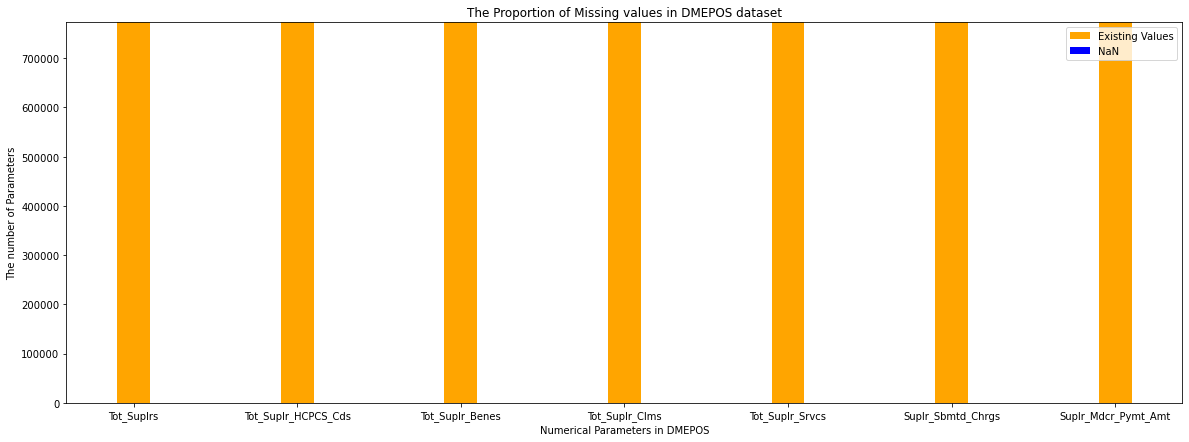

In [42]:
#Comparing the number of NaNs and the number of non-NaNs in DMEPOS to make sure there is no missing value in the data
x_axis_DMEPOS = ('Tot_Suplrs','Tot_Suplr_HCPCS_Cds','Tot_Suplr_Benes','Tot_Suplr_Clms','Tot_Suplr_Srvcs','Suplr_Sbmtd_Chrgs','Suplr_Mdcr_Pymt_Amt')
x = x_axis_DMEPOS
y1 = non_nan_number_in_DMEPOS
y2 = nan_number_in_DMEPOS
plt.figure(figsize=(20,7))
plt.bar(x_axis_DMEPOS, y1, width=0.2, color='orange', label='Existing Values')
plt.bar(x_axis_DMEPOS, y2, width=0.2, color='blue', label='NaN', bottom=y1)
plt.title('The Proportion of Missing values in DMEPOS dataset')
plt.xlabel('Numerical Parameters in DMEPOS')
plt.ylabel('The number of Parameters')
plt.legend()

#the code used to save the plot
plt.savefig('The Proportion of Missing values in DMEPOS.jpg')

In [43]:
# List of numerical columns in Part_B_concat
numerical_columns = ['Tot_HCPCS_Cds', 'Tot_Benes', 'Tot_Srvcs', 'Tot_Sbmtd_Chrg', 'Tot_Mdcr_Pymt_Amt', 'Bene_Avg_Risk_Scre']

# Count the number of NaN values in each numerical column
nan_number_in_part_b = [Part_B_concat[column].isna().sum() for column in numerical_columns]


nan_number_in_part_b

[0, 0, 0, 0, 0, 0]

In [44]:
non_nan_number_in_part_b = [2317410,2317410,2317410,2317410,2317410,2317410]
non_nan_number_in_part_b

[2317410, 2317410, 2317410, 2317410, 2317410, 2317410]

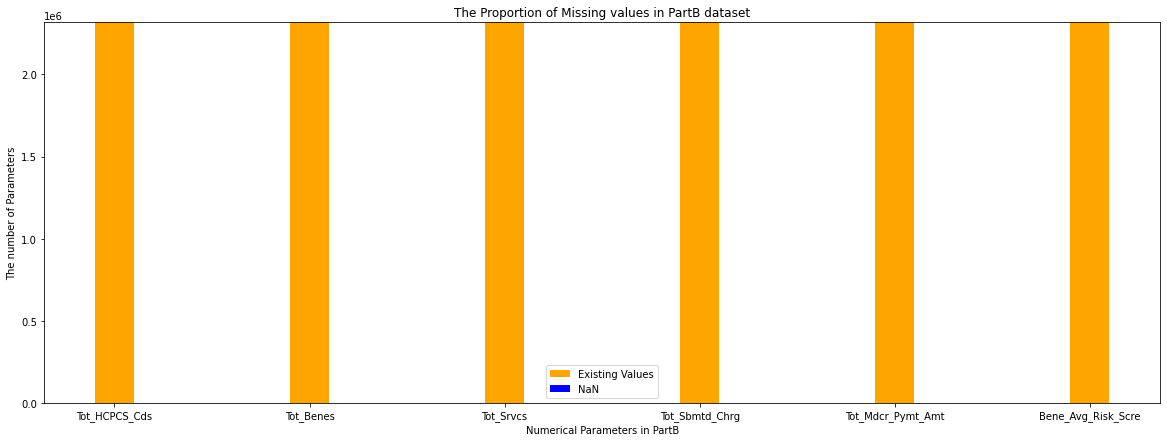

In [45]:
#Comparing the number of NaNs and the number of non-NaNs in part_b to make sure there is no missing value in the data
x_axis_part_b = ('Tot_HCPCS_Cds','Tot_Benes','Tot_Srvcs','Tot_Sbmtd_Chrg','Tot_Mdcr_Pymt_Amt', 'Bene_Avg_Risk_Scre')
x = x_axis_part_b
y1 = non_nan_number_in_part_b
y2 = nan_number_in_part_b
plt.figure(figsize=(20,7))
plt.bar(x_axis_part_b, y1, width=0.2, color='orange', label='Existing Values')
plt.bar(x_axis_part_b, y2, width=0.2, color='blue', label='NaN', bottom=y1)
plt.title('The Proportion of Missing values in PartB dataset')
plt.xlabel('Numerical Parameters in PartB')
plt.ylabel('The number of Parameters')
plt.legend()

#the code used to save the plot
plt.savefig('The Proportion of Missing values in PartB.jpg')

In [46]:
# List of numerical columns in Part_D_concat
numerical_columns = ['Tot_Clms', 'Tot_30day_Fills', 'Tot_Day_Suply', 'Tot_Drug_Cst', 'Tot_Benes']

# Count the number of NaN values in each numerical column
nan_number_in_part_d = [Part_D_concat[column].isna().sum() for column in numerical_columns]


nan_number_in_part_d

[0, 0, 0, 0, 0]

In [47]:
non_nan_number_in_part_d=[2495768,2495768,2495768,2495768,2495768]
non_nan_number_in_part_d

[2495768, 2495768, 2495768, 2495768, 2495768]

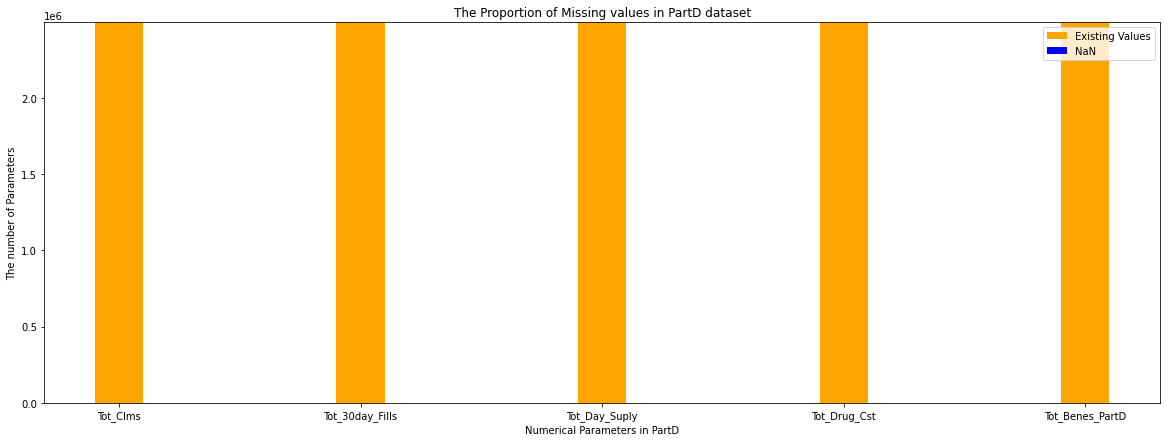

In [48]:
#comparing the number of NaNs and the number of non-NaNs in part d to make sure there is no missing value in the dataset
x_axis_part_d = ('Tot_Clms','Tot_30day_Fills','Tot_Day_Suply','Tot_Drug_Cst','Tot_Benes_PartD')
x = x_axis_part_d
y1 = non_nan_number_in_part_d
y2 = nan_number_in_part_d
plt.figure(figsize=(20,7))
plt.bar(x_axis_part_d, y1, width=0.2, color='orange', label='Existing Values')
plt.bar(x_axis_part_d, y2, width=0.2, color='blue', label='NaN', bottom=y1)
plt.title('The Proportion of Missing values in PartD dataset')
plt.xlabel('Numerical Parameters in PartD')
plt.ylabel('The number of Parameters')
plt.legend()

#the code used to save the plot
plt.savefig('The Proportion of Missing values in PartD.jpg')